# NLP SUMMATIVE 2__studentID: 21001051334

First and foremost, I installed the necessary libraries. 

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

I imported the VADER (Valence Aware Dictionary for Sentiment Reasoning) module from NLTK. It provides a single sentiment-score from -1 to 1, and labelled as ‘positive’, ‘negative’ and ‘neutral’. 

In [14]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Kishwar
[nltk_data]     Nawsheen\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
sia = SentimentIntensityAnalyzer()

The dataframe contains the top 18 thousand comments from different threads from reddit when you type ‘Shamima Begum’. 
The most important column is ‘comment’. For the sake of this project, all other columns are ignored. 

In [127]:
df = pd.read_excel("sb_v2.xlsx")
df

subreddit                                              title  \
0      worldnews  ISIS bride Shamima Begum not allowed to return...   
1      worldnews  ISIS bride Shamima Begum not allowed to return...   
2      worldnews  ISIS bride Shamima Begum not allowed to return...   
3      worldnews  ISIS bride Shamima Begum not allowed to return...   
4      worldnews  ISIS bride Shamima Begum not allowed to return...   
...          ...                                                ...   
18262  worldnews  ISIS bride Shamima Begum not allowed to return...   
18263  worldnews  ISIS bride Shamima Begum not allowed to return...   
18264  worldnews  ISIS bride Shamima Begum not allowed to return...   
18265  worldnews  ISIS bride Shamima Begum not allowed to return...   
18266  worldnews  Isil bride Shamima Begum has British citizensh...   

               author                                            comment  \
0       Saor-Alba1314  Struggling to find any sympathy for her. Yea s...   
1         BuckNut2000  Girl joins ISIS\n\nUK revokes citizenship\n\n ...   
2             Tryoxin  I just love the look on her face in this pictu...   
3              #NAME?  Saying she had hoped her son would become a so...   
4        boblebob1882  Loads of people ITT essentially saying she's t...   
...               ...                                                ...   
18262  Frenchticklers  Probably sets a bad precedent if she isn't all...   
18263     veracassidy  The principal here is that if they can do it t...   
18264       pastdense  Man.... all three of her children have died.\n...   
18265        saberuin  Jesus christ the amount of people that will co...   
18266         Thbdimi  But is "being a whore" to terrorists really th...   

       score                                             lemmas  
0      13010  ['Struggling', 'to', 'find', 'any', 'sympathy'...  
1       5796  ['Girl', 'join', 'ISIS', 'UK', 'revoke', 'citi...  
2       5660  ['I', 'just', 'love', 'the', 'look', 'on', 'he...  
3       5584  ['Saying', 'she', 'had', 'hoped', 'her', 'son'...  
4       5304  ['Loads', 'of', 'people', 'ITT', 'essentially'...  
...      ...                                                ...  
18262    -74  ['Probably', 'set', 'a', 'bad', 'precedent', '...  
18263    -75  ['The', 'principal', 'here', 'is', 'that', 'if...  
18264    -76  ['Man', '....', 'all', 'three', 'of', 'her', '...  
18265   -100  ['Jesus', 'christ', 'the', 'amount', 'of', 'pe...  
18266   -147  ['But', 'is', '``', 'being', 'a', 'whore', "''...  

[18267 rows x 6 columns]

### NLP ANALYSIS 1: Sentiment Analysis of Comments

The code below the comments in the dataframe above and returns a polarity score ranging from -1 to 1. The closer to zero, the more ‘neutral’ the comment supposedly is. 

In [78]:
sentiment_comments = df['comment'].apply(lambda x: sia.polarity_scores(x)['compound'])

Below is a Series of scores of all the 18 thousand comments.

In [83]:
sentiment_comments

0       -0.9042
1        0.1842
2        0.6369
3        0.6486
4       -0.8860
          ...  
18262   -0.3400
18263   -0.5106
18264   -0.9337
18265   -0.8345
18266   -0.9783
Name: comment, Length: 18267, dtype: float64

The mean sentiment is shown below. A mean of **-0.169 **  indicates a slightly negative skew of the results. 

In [132]:
mean_sentiment = sentiment.mean()
print('Mean sentiment score:', mean_sentiment)

Mean sentiment score: -0.1689730771336292


<AxesSubplot:xlabel='comment'>

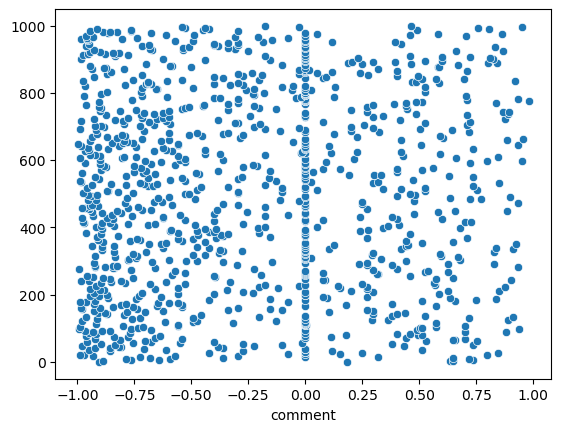

In [124]:
sns.scatterplot(x = sentiment_comments[0:1000], y = range(1000))

The graph shows the sentiment scores of the first 1000 comments in the dataframe. Since 18 thousand is too many data entries to produce a legible graph, a limit of 1000 was chosen. There is a larger clustering of comments on the negative side than on the positive side, indicating overall, the comments in reddit regarding Shamima Begum is skew towards the negative. 

### NLP ANALYSIS 2: named entity recognition

The second analysis is NER (named entity recognition) in order to which nouns are most discussed in the comments regarding Shamima Begum. 

As usual, I installed and imported the relevant libraries:

In [89]:
# download relevant libraries
! pip install spacy
! pip install nltk
! python -m spacy download en_core_web_sm

# import libraries
import spacy
from spacy import displacy
from spacy import tokenizer
nlp = spacy.load('en_core_web_sm')

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.



     --------------------------------------- 12.2/12.2 MB 10.5 MB/s eta 0:00:00
     ------------------------------------- 181.6/181.6 kB 11.4 MB/s eta 0:00:00
     ---------------------------------------- 96.8/96.8 kB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 9.4 MB/s eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB ? eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 10.7 MB/s eta 0:00:00
     ------------------------------------- 482.8/482.8 kB 10.1 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 10.9 MB/s eta 0:00:00
  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.5
    Uninstalling colorama-0.4.5:
      Successfully uninstalled colorama-0.4.5
     ---------------------------------------- 12.8/12.8 MB 9.1 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In order to convert the 'comment' column to a list, I used the code below. All the comments in the list are strings:

In [90]:
comment_list = df.comment.values.tolist()
new_comment_list = '. '.join(comment_list)

In [93]:
new_comment_list

'Struggling to find any sympathy for her. Yea she was groomed at 16 and yea we all did stupid shit in our teens but joining a terrorist cult is the mother of all teenage fuckups. \n\nActions have consequences, people need to learn this.. Girl joins ISIS\n\nUK revokes citizenship\n\n Girl ~~realizes the ISIS thing wasn\'t as good as it sounded~~ says she doesn\'t regret leaving and joining ISIS and wants back in her home country. \n\nUK says "haha no"\n\n\\*shocked Pikachu face\\*\n\n&#x200B;\n\nEdit for more accuracy. I just love the look on her face in this picture. It just gives off some top-tier *"Hm, I may not have thought this through fully"* vibes.. Saying she had hoped her son would become a soldier for ISIS didn’t exactly help.. Loads of people ITT essentially saying she\'s the victim because she was only 15 when she left the UK. When she was 19 she said in an interview with Sky that she had no regrets over joining ISIS (despite losing kids). She carried around a rifle and had 

Below is the code that identifies the different entities in the comments. The limit for analysis is 1 million, whereas I had 5 million entries. I decided to use the first million entries. 

In [96]:
doc = nlp(new_comment_list[:1000000])
sentences = list(doc.sents)

# print entities
ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents]
displacy.render(doc, style='ent', jupyter=True)

Here, I created a for loop and two lists. _List_of_ents_ contains all the entities that was recognised above. _List_of_labels_ contains all the labels attached to those entities. 

In [101]:
list_of_ents = []
list_of_labels = []
    
for entity in ents:
    list_of_ents.append(entity[0])
    list_of_labels.append(entity[3])

list_of_labels

['DATE',
 'ORG',
 'GPE',
 'ORG',
 'ORG',
 'ORG',
 'GPE',
 'CARDINAL',
 'ORG',
 'PERSON',
 'ORG',
 'GPE',
 'DATE',
 'ORG',
 'ORG',
 'ORG',
 'GPE',
 'ORG',
 'PERCENT',
 'ORG',
 'PERSON',
 'GPE',
 'NORP',
 'ORG',
 'DATE',
 'PERSON',
 'PERSON',
 'GPE',
 'NORP',
 'PERSON',
 'DATE',
 'ORG',
 'NORP',
 'GPE',
 'ORG',
 'WORK_OF_ART',
 'ORG',
 'GPE',
 'ORG',
 'DATE',
 'CARDINAL',
 'CARDINAL',
 'CARDINAL',
 'ORG',
 'PERSON',
 'ORG',
 'GPE',
 'GPE',
 'GPE',
 'NORP',
 'NORP',
 'NORP',
 'NORP',
 'ORDINAL',
 'DATE',
 'DATE',
 'CARDINAL',
 'NORP',
 'CARDINAL',
 'GPE',
 'CARDINAL',
 'CARDINAL',
 'GPE',
 'PERSON',
 'DATE',
 'ORDINAL',
 'TIME',
 'PERSON',
 'NORP',
 'PERSON',
 'PERSON',
 'ORG',
 'PERSON',
 'CARDINAL',
 'ORG',
 'GPE',
 'ORG',
 'ORG',
 'GPE',
 'CARDINAL',
 'CARDINAL',
 'PERSON',
 'NORP',
 'DATE',
 'GPE',
 'CARDINAL',
 'PERSON',
 'ORDINAL',
 'GPE',
 'ORG',
 'ORG',
 'NORP',
 'NORP',
 'NORP',
 'NORP',
 'PERSON',
 'FAC',
 'GPE',
 'LOC',
 'ORG',
 'NORP',
 'CARDINAL',
 'ORG',
 'ORDINAL',
 'ORG',


This cell converts the list into a set. 

In [115]:
unique_ents = set(list_of_ents)
list = []

for entity in unique_ents:
    list.append([entity, list_of_ents.count(entity)])
    

This function sorts the entities by order of highest frequency to lowest:

In [121]:
def entityfunc(list):
    return list[1]
list.sort(reverse = True, key=entityfunc)
list

[['UK', 877],
 ['British', 513],
 ['ISIS', 415],
 ['Bangladesh', 282],
 ['Bangladeshi', 279],
 ['Syria', 222],
 ['Begum', 150],
 ['one', 119],
 ['Britain', 104],
 ['first', 100],
 ['15', 100],
 ['15 year old', 64],
 ['two', 61],
 ['US', 52],
 ['Syrian', 44],
 ['Islamic', 42],
 ['ISIL', 40],
 ['Shamima Begum', 36],
 ['Muslim', 36],
 ['Kurds', 34],
 ['3', 30],
 ['21', 29],
 ['second', 29],
 ['Canadian', 29],
 ['Irish', 29],
 ['Iraq', 28],
 ['Home', 28],
 ['Shamima', 27],
 ['One', 26],
 ['british', 26],
 ['15 year olds', 26],
 ['Muslims', 26],
 ['Ms Begum', 25],
 ['years', 25],
 ['#', 24],
 ['2', 23],
 ['London', 23],
 ['Manchester', 23],
 ['1', 21],
 ['Isis', 20],
 ['France', 19],
 ['uk', 19],
 ['Europe', 18],
 ['English', 18],
 ['ECHR', 18],
 ['Government', 18],
 ['Russia', 17],
 ['Brits', 17],
 ['zero', 17],
 ['U.K.', 17],
 ['Canada', 17],
 ['three', 17],
 ['thousands', 17],
 ['American', 16],
 ['BBC', 16],
 ['Islam', 16],
 ['French', 16],
 ['England', 16],
 ['100%', 15],
 ['Nazi', 15]

### Bounus Analysis 2.1:  Double combo

Here, I decided to perform sentiment analysis on the comments containing the top 25 entities identified above. 

In [122]:
list25 = list[:25]
new_list25 = []
for thing in list25:
    new_list25.append(thing[0])
new_list25

['UK',
 'British',
 'ISIS',
 'Bangladesh',
 'Bangladeshi',
 'Syria',
 'Begum',
 'one',
 'Britain',
 'first',
 '15',
 '15 year old',
 'two',
 'US',
 'Syrian',
 'Islamic',
 'ISIL',
 'Shamima Begum',
 'Muslim',
 'Kurds',
 '3',
 '21',
 'second',
 'Canadian',
 'Irish']

The cell below calculates the mean sentiment analysis of all the comments contanining the top 25 entities only. It is interesting that '15 year old' has the most negative mean sentiment at _-0.37_, even lower than ISIS which is _-0.29_ 

In [137]:
for entity in new_list25:
    temp_df = df.loc[df['comment'].str.contains(entity)]
    sentiment_comments = temp_df['comment'].apply(lambda x: sia.polarity_scores(x)['compound'])
    mean_sentiment = sentiment_comments.mean()
    print('Mean sentiment score for {}:'.format(entity), mean_sentiment)

Mean sentiment score for UK: -0.28373995106606115
Mean sentiment score for British: -0.2547816825775654
Mean sentiment score for ISIS: -0.2912244159758859
Mean sentiment score for Bangladesh: -0.11464553459119498
Mean sentiment score for Bangladeshi: -0.09724091858037574
Mean sentiment score for Syria: -0.2667679845708773
Mean sentiment score for Begum: -0.24963721854304635
Mean sentiment score for one: -0.269019117971334
Mean sentiment score for Britain: -0.32293626666666675
Mean sentiment score for first: -0.25786507592190877
Mean sentiment score for 15: -0.3548060859188545
Mean sentiment score for 15 year old: -0.36799546925566345
Mean sentiment score for two: -0.2942829411764706
Mean sentiment score for US: -0.2368603448275859
Mean sentiment score for Syrian: -0.31496150234741777
Mean sentiment score for Islamic: -0.36261676300578016
Mean sentiment score for ISIL: -0.26872337662337664
Mean sentiment score for Shamima Begum: -0.3329267716535433
Mean sentiment score for Muslim: -0.30

In [135]:
temp_df

subreddit                                              title  \
80     unitedkingdom  Sky News: Shamima Begum loses legal case over ...   
190    unitedkingdom  Sky News: Shamima Begum loses legal case over ...   
596    unitedkingdom  Sky News: Shamima Begum loses legal case over ...   
905       ukpolitics  Shamima Begum loses citizenship challenge - BB...   
1346   unitedkingdom  Sky News: Shamima Begum loses legal case over ...   
...              ...                                                ...   
17075      worldnews  ISIS bride Shamima Begum not allowed to return...   
17188  unitedkingdom  Shamima Begum is about to find out if she's al...   
17381  unitedkingdom  Sky News: Shamima Begum loses legal case over ...   
17808  unitedkingdom  Shamima Begum ‘knew what she was doing’ with S...   
18029     ukpolitics  Shamima Begum loses appeal against removal of ...   

                   author                                            comment  \
80          CowardlyFire2  Also mean that any Irish and Jewish folk can h...   
190            ihateirony  Yeah, I'm Irish and live in the UK, have done ...   
596            ihateirony  Here's the thing though. Before this I had a c...   
905               ieya404  Pretty sure everyone in Northern Ireland is ac...   
1346        CowardlyFire2  Any Irish person who supported the IRA, so lik...   
...                   ...                                                ...   
17075  thegoodyinthehoody  Yeah if she were Irish I would 100% want that ...   
17188          timmystwin  Bangladesh has no record of her being a Citize...   
17381     michael31415926  What? Oh please. You don't even need citizensh...   
17808         umop_apisdn                 Like we did to the Irish you mean?   
18029           gertninja  If they apply, she never applied, why do you t...   

       score                                             lemmas  
80       379  ['Also', 'mean', 'that', 'any', 'Irish', 'and'...  
190      149  ['Yeah', ',', 'I', "'m", 'Irish', 'and', 'live...  
596       45  ['Here', "'s", 'the', 'thing', 'though', '.', ...  
905       29  ['Pretty', 'sure', 'everyone', 'in', 'Northern...  
1346      20  ['Any', 'Irish', 'person', 'who', 'supported',...  
...      ...                                                ...  
17075     -2  ['Yeah', 'if', 'she', 'were', 'Irish', 'I', 'w...  
17188     -2  ['Bangladesh', 'ha', 'no', 'record', 'of', 'he...  
17381     -3  ['What', '?', 'Oh', 'please', '.', 'You', 'do'...  
17808     -6  ['Like', 'we', 'did', 'to', 'the', 'Irish', 'y...  
18029     -9  ['If', 'they', 'apply', ',', 'she', 'never', '...  

[130 rows x 6 columns]

### REFLECTION

Pre-processing is key: the biggest takeaway from this assignment. 
One of the biggest challenges I faced during this process was the lack of pre-processing and cleaning I did in the previous assessment. 

Initially, I tried to carry out sentiment analysis on the lemmas, which resulted in a sentiment score of zero (or neutral). Given the emotive nature of some of the comments, this result seemed unlikely. Since the actual content of the 'comment' column and the 'lemmas' are largely similar, I used the sentiment score of the 'comment' column as a measure of whether the sentiment analyser was working or not.  I ignored the lemmas and tried to find the sentiment score of the 'comment' column.

Finally, the quality of this piece of work is heavily undermined by the lack of proficiency in python. The insights that I gathered were interesting and thought-provoking, but ultimately intuitive. For example, the NER analysis revealed that ‘UK’, ‘British’ and ‘Bangladesh’ were in the top 5 most common topics discussed. This could be interesting when looking at discussions surrounding ethnicity and race: Shamima Begum was born, raised, educated and radicalised in England, yet her the heritage of her parents (who are from Bangladesh) is still being brought up. However, Begum herself does not have any ties to the country. This analysis provides proof that her ethnicity is brought nearly as frequently as the UK (her home) and ISIS (the terrorist organisation she left home to join). 

This is an interesting insight, but not necessarily ground-breaking. The analysis took hours and hours of work and tears. Yet the conclusion is largely the same as the ones I had after reading a few articles surrounding the Shamima Begum citizenship issue. While most say googling, trial and error messages are the fundamental pillars of coding, spending so much time trying to find supposedly ‘obvious’ things, only to derive conclusions I was already aware of is somewhat disheartening.  

Nevertheless, this assignment allowed me to gain a better appreciation for NLP (and the python programming language in general), and has acted as motivation to my proficiency, so that one day in the distant future, I can derive non-obvious conclusions, rather than ones like “comments in reddit regarding Shamima Begum is skew towards the negative.”




This work contains [705] words